<a href="https://colab.research.google.com/github/Shivam-98350/ml_foundation_casestudy_coursera/blob/main/house_data_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install turicreate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import turicreate as tc

In [ ]:
from zipfile import ZipFile
file_name = "2SnLy-JAEemx8A5HK6Ls8g_0ccbc21b1656423ba7e9d7fe2971879a_home_data.sframe.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


# New Section

In [ ]:
sales = tc.SFrame('/content/home_data.sframe')

In [ ]:
sales


In [ ]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [ ]:
tc.visualization.scatter(sales['sqft_living'],sales['price'])

In [ ]:
train_data,test_data=sales.random_split(0.8,seed=0)

In [ ]:
sqft_model=tc.linear_regression.create(train_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.015087     | 4333720.514634     | 2186993.773991       | 263239.030769                   | 257364.025966                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
test_data['price'].mean()

543054.0425632533

In [ ]:
sqft_model.evaluate(test_data)

{'max_error': 4131254.3977435804, 'rmse': 255237.84376110262}

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

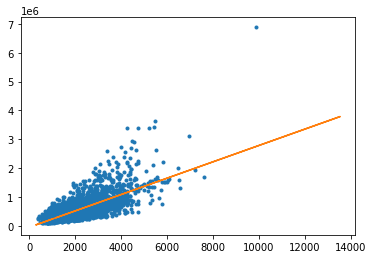

In [ ]:
plt.plot(test_data['sqft_living'],test_data['price'],".",train_data['sqft_living'],sqft_model.predict(train_data),"-")

In [ ]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-50865.556980266585,5057.511453155505
sqft_living,None,283.58050143950317,2.222493736312609


In [ ]:
my_features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [ ]:
sales[my_features].show()


Materializing SFrame

In [ ]:
tc.visualization.box_plot(sales['zipcode'],sales['price'])

In [ ]:
my_model=tc.linear_regression.create(train_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 8

Number of unpacked features : 8

Number of coefficients    : 77

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.068314     | 4005882.929492     | 2155909.638260       | 185581.210019                   | 206067.115574                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [ ]:
my_model.evaluate(test_data)

{'max_error': 3025830.6861252496, 'rmse': 178616.51349854813}

In [ ]:
sqft_model.evaluate(test_data)

{'max_error': 4131254.3977435804, 'rmse': 255237.84376110262}

In [ ]:
house1=sales[sales['zipcode']=='98039']

In [ ]:
house1['price'].mean()

2160606.6000000006

In [ ]:
x=sales[sales['sqft_living']<=4000]
x.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

<img src="house1.png">

In [ ]:
from zipfile import ZipFile
file_name = "MBq-aOehEeiaxBKyA9PBAg_30681ac0e7a111e8bebc0104e43381c0_house_images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


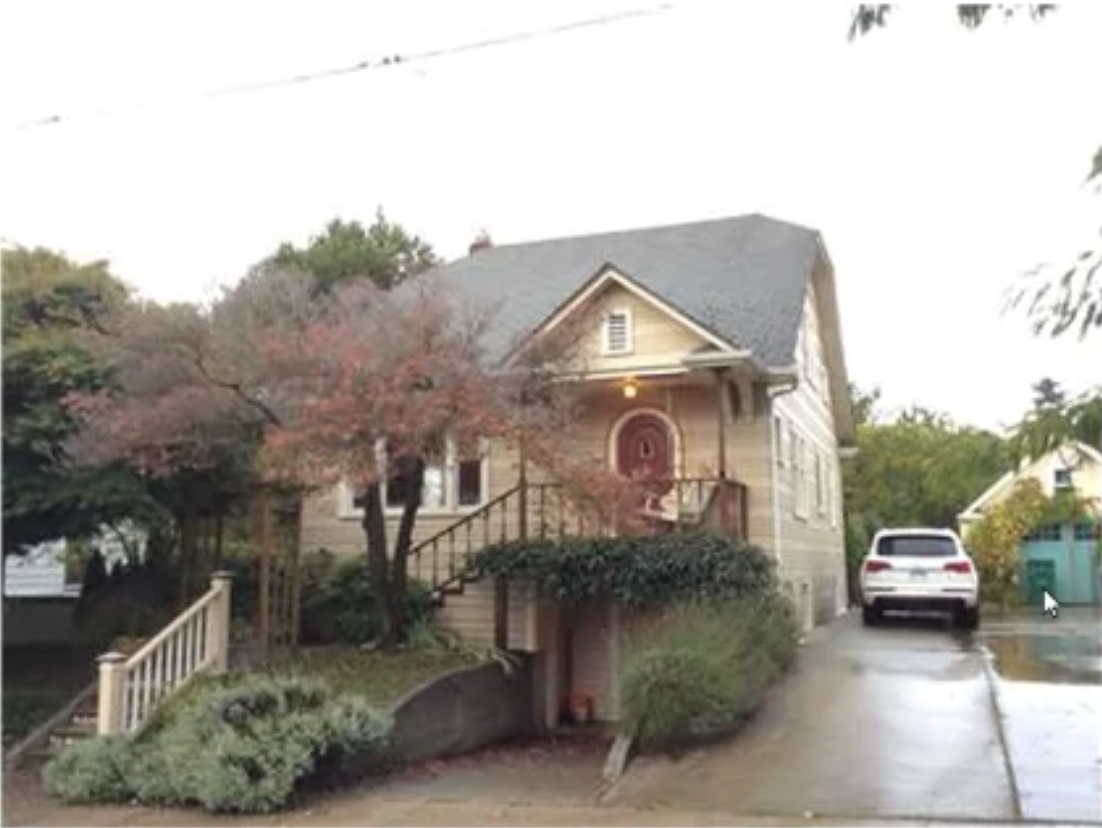

In [ ]:
image=tc.Image("/content/house_images/house1.png")
image.show()

In [ ]:
house1['price']

dtype: float
Rows: 1
[620000.0]

In [ ]:
sqft_model.predict(house1)

dtype: float
Rows: 1
[629727.646474541]

In [ ]:
my_model.predict(house1)

dtype: float
Rows: 1
[725535.2951653699]